In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

In [2]:
X, y = mglearn.datasets.make_forge()

C:\Users\LG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [3]:
X.shape # number of samples : 26, number of features : 2

(26, 2)

In [4]:
y.shape # classification(0, 1)

(26,)

In [5]:
print(X)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]


In [6]:
print(y)

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


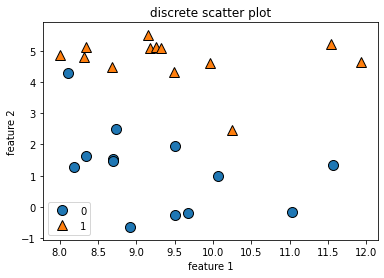

In [7]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
# : means all data
plt.title('discrete scatter plot')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(loc = 3)

In [8]:
from sklearn.model_selection import train_test_split
# random state : 다음에 test를 실행했을 때 같은 testset을 사용하기 위해
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [9]:
X_train.shape

(19, 2)

In [10]:
X_test.shape

(7, 2)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
print(y_pred)

[1 0 1 0 1 0 0]


In [14]:
print(y_test)

[1 0 1 0 1 1 0]


In [15]:
clf.score(X_test, y_test) # accuracy for classfication

0.8571428571428571

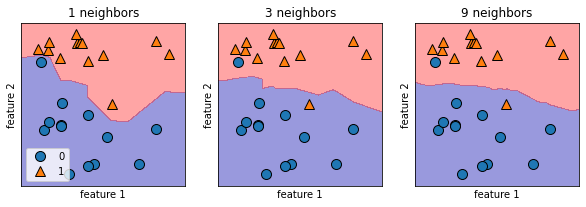

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3)) # subplots(rows, cols)
# ax = 3, Keep in mind ax = ax!
for n_neighbor, ax in zip([1, 3, 9], axes): # zip : tie arrays with the same numbers 
    clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X, y) # modeling
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, alpha = 0.4, ax = ax) # eps : 가장자리 폭, alpha : 선명도
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    
    # different from plt.title
    ax.set_title('{} neighbors'.format(n_neighbor))
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
axes[0].legend(loc = 3)

In [17]:
training_accuracy = []
testing_accuracy = []
for n_neighbor in [1, 3, 9]:
    clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    testing_accuracy.append(clf.score(X_test, y_test))

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [19]:
print(cancer.data.shape)

(569, 30)


In [20]:
print(cancer.target.shape)

(569,)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)

In [22]:
X_train.shape

(426, 30)

In [23]:
X_test.shape

(143, 30)

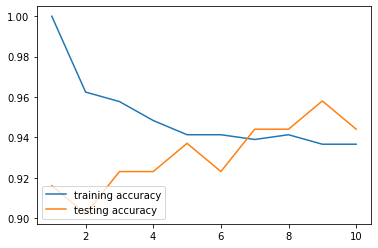

In [24]:
training_accuracy = []
testing_accuracy = []

for n_neighbor in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbor).fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    testing_accuracy.append(clf.score(X_test, y_test))

# plt.plot is drawing line
plt.plot(range(1, 11), training_accuracy, label = 'training accuracy')
plt.plot(range(1, 11), testing_accuracy, label = 'testing accuracy')
plt.legend(loc = 3)

In [25]:
from mglearn.datasets import make_wave
X, y = make_wave(n_samples=150)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [27]:
X.shape

(150, 1)

In [28]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=1).fit(X_train, y_train)
# for regression, accuracy is r_squared
reg.score(X_train, y_train)
reg.score(X_test, y_test)

0.5564277261801706

In [29]:
y_pred = reg.predict(X_test)

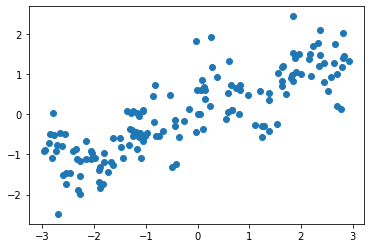

In [30]:
# plt.scatter is drawing a dot
plt.scatter(X, y)

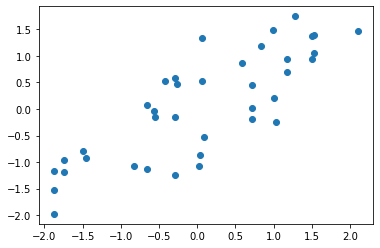

In [31]:
# the narrorwer gap is more accurate
plt.scatter(y_pred, y_test)

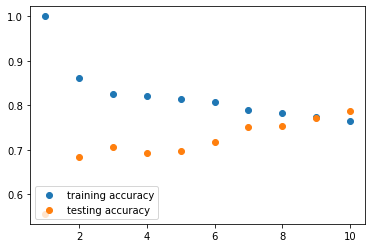

In [32]:
training_accuracy = []
testing_accuracy = []
for n_neighbor in range(1, 11):
    reg = KNeighborsRegressor(n_neighbors=n_neighbor).fit(X_train, y_train)
    training_accuracy.append(reg.score(X_train, y_train))
    testing_accuracy.append(reg.score(X_test, y_test))
plt.scatter(range(1, 11), training_accuracy, label = 'training accuracy')
plt.scatter(range(1, 11), testing_accuracy, label = 'testing accuracy')
plt.legend(loc = 3)